In [2]:
import numpy as np
from numpy import fft
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque

import scipy.signal as signal

def display_image(filename):
    # Read file it np array
    im = misc.imread(filename) 

    plt.figure(figsize=(40,20))
    # Display with grayscale colour map 
    plt.imshow(im,cmap=plt.cm.gray)

    # Show the image
    plt.show()
    
    return im

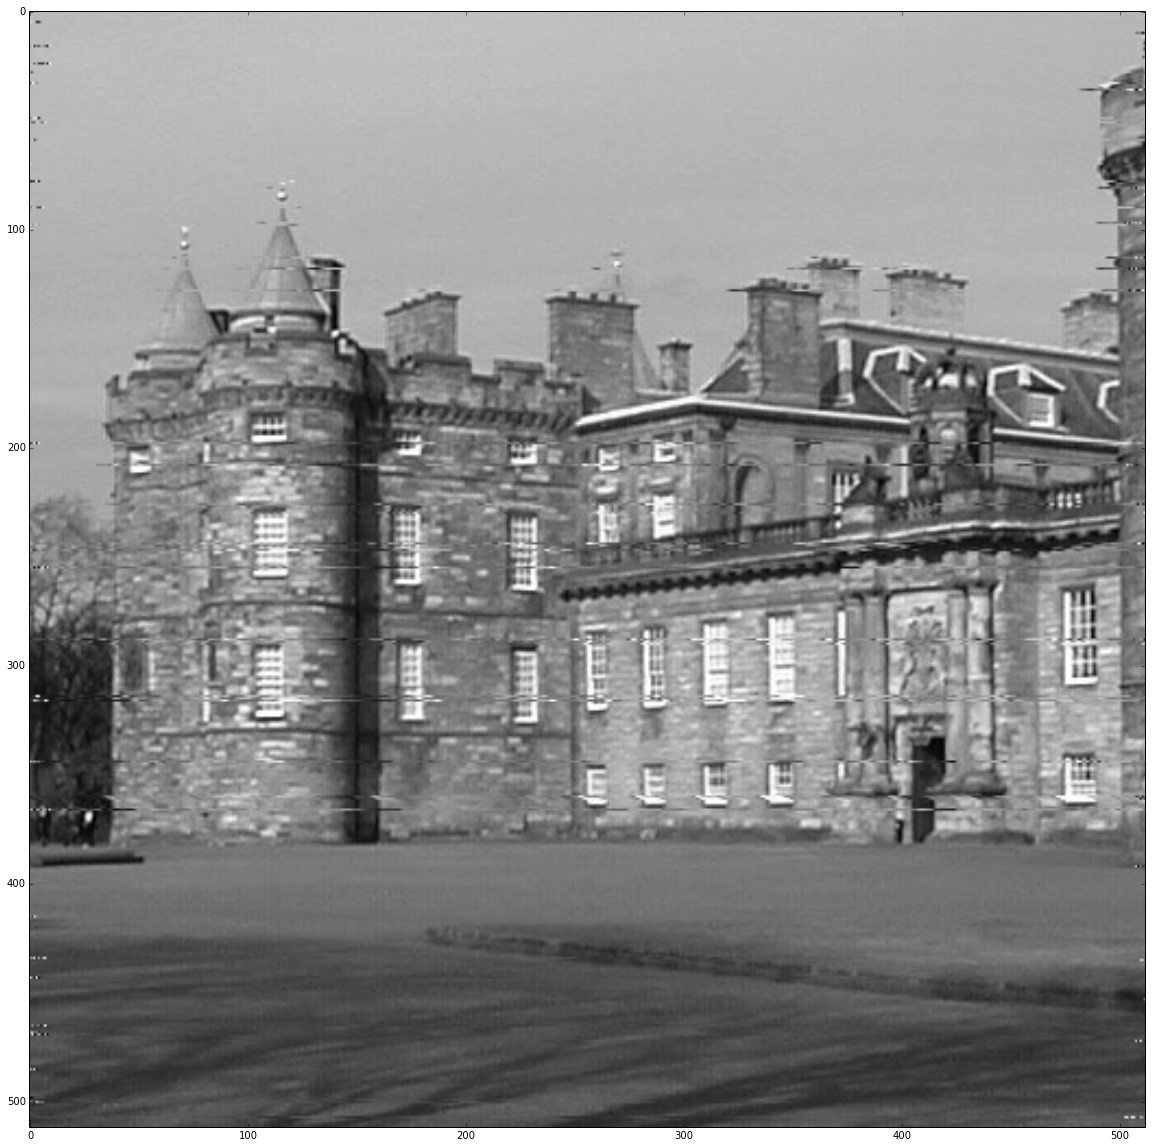

In [144]:
im = display_image('images/desync1.pgm')

(9, 20)


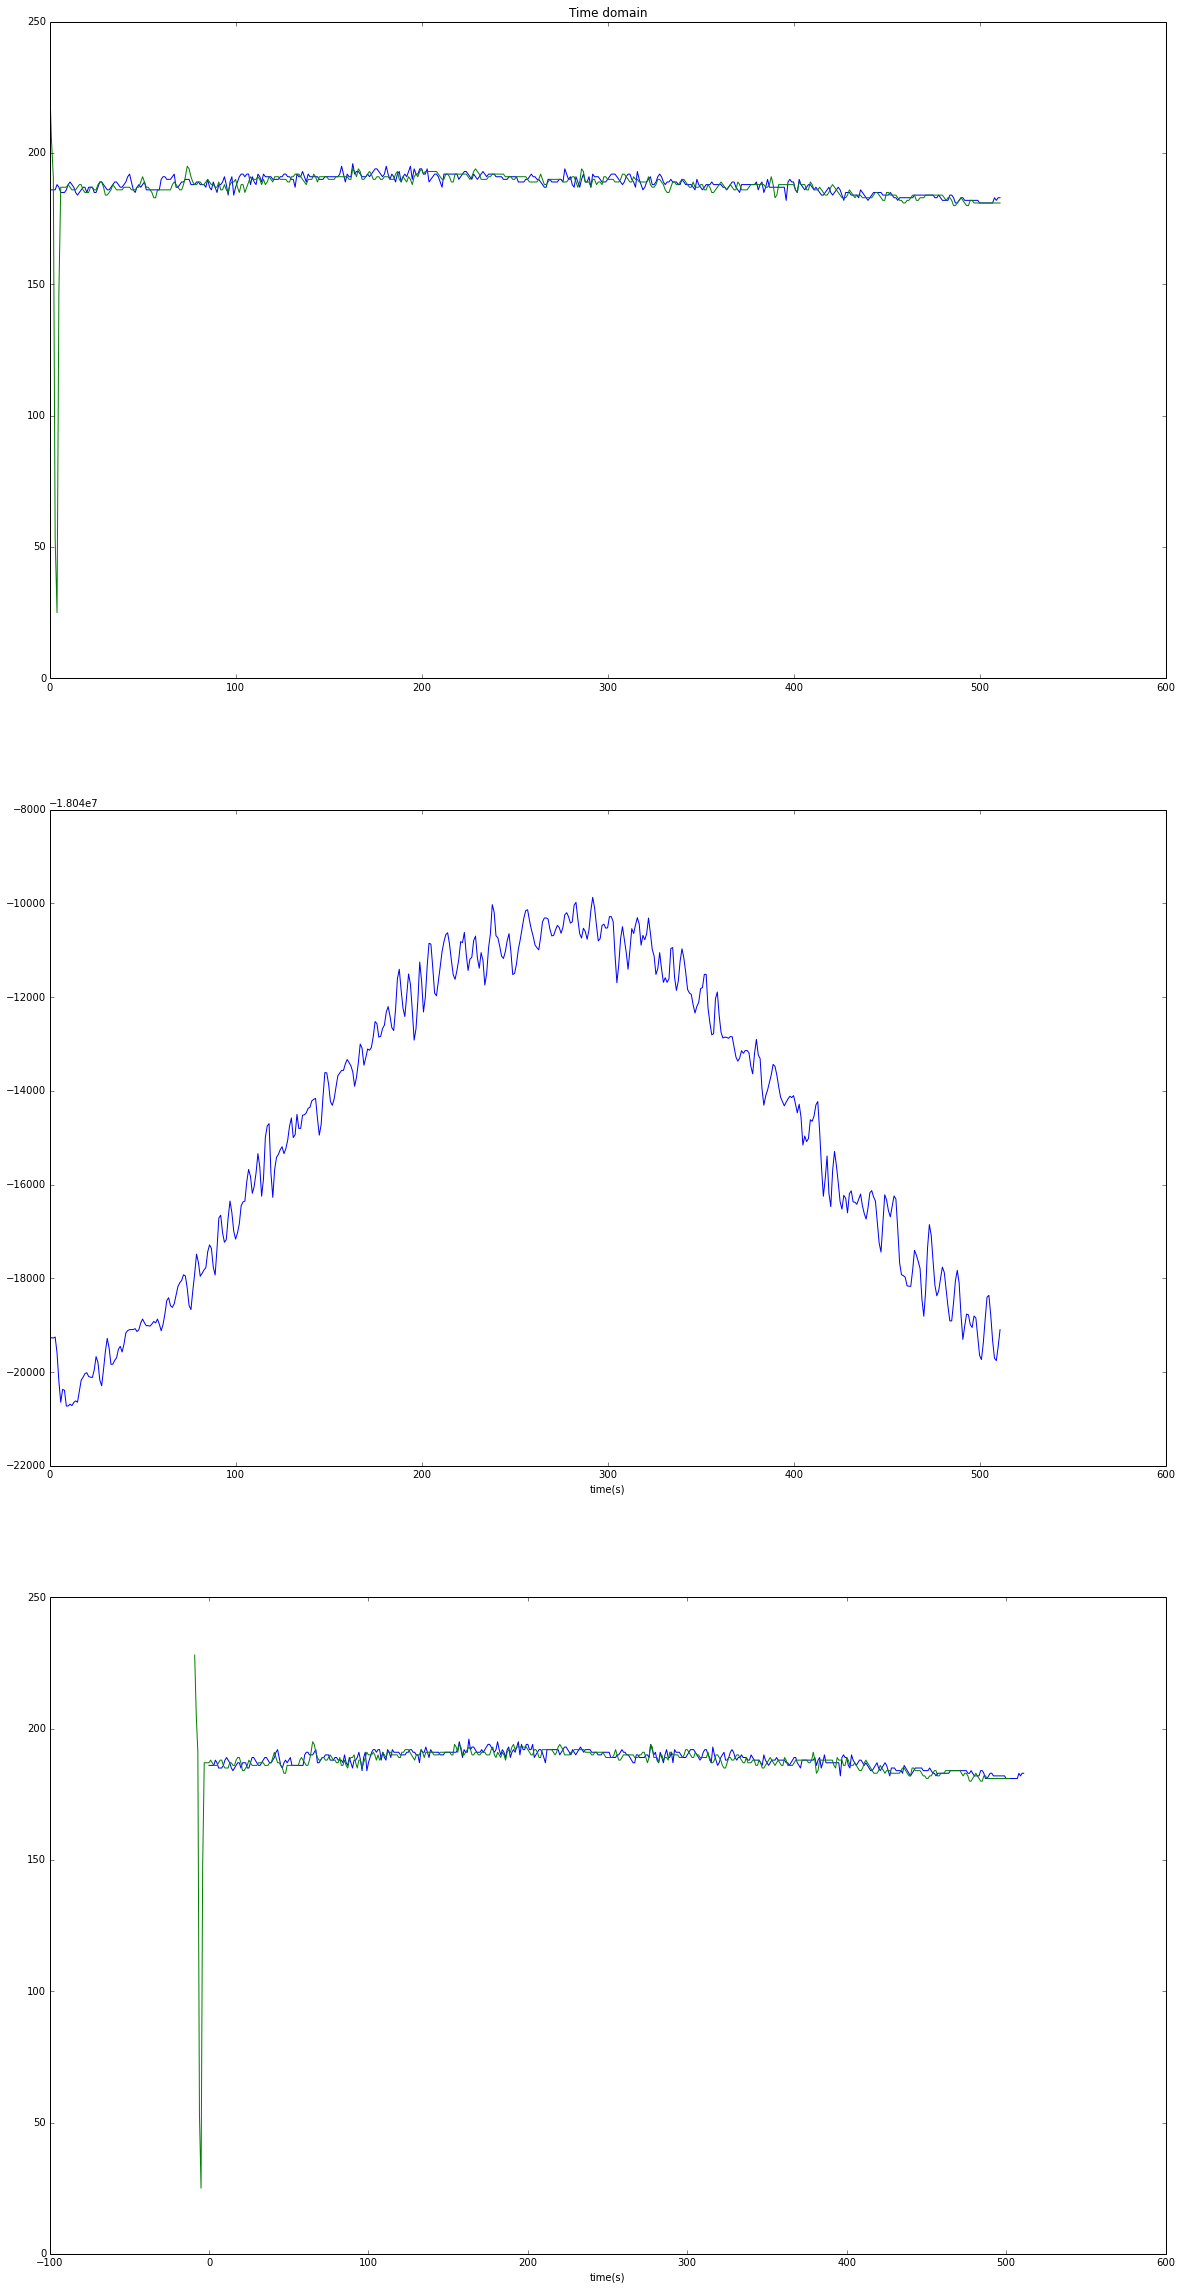

In [132]:
fig = plt.figure(figsize=(20,40))

#-----------------
# Create the input waveform in the time domain

samples = len(im[4])
increments = np.arange(samples)

#Make up a list of times in in a single period of 0 ->> 2*pi
times = increments

#Create the time domain signal with the required number of samples
signal_one = np.array(im[4])
signal_two = np.array(im[5])

fig.add_subplot(311)
plt.plot( times, signal_one )
plt.plot( times, signal_two )
plt.title('Time domain')

#-----------------
# Create the transform in the frequency domain


A = fft.fft(signal_one)
B = fft.fft(signal_two)
Ar = -A.conjugate()
Br = -B.conjugate()

plt.subplot(3,1,2)
plt.plot(fft.ifft(Ar*B))
plt.xlabel('time(s)')

idx = np.argmax(np.abs(fft.ifft(Ar*B)))

if idx > len(im)/2.:
    idx = len(im)-idx
    
print(idx,x[idx])


plt.subplot(3,1,3)
plt.plot(times, signal_one)
plt.plot(times-idx, signal_two)
plt.xlabel('time(s)')


plt.show()

(0, 0)
(1, 9)
(2, 3)


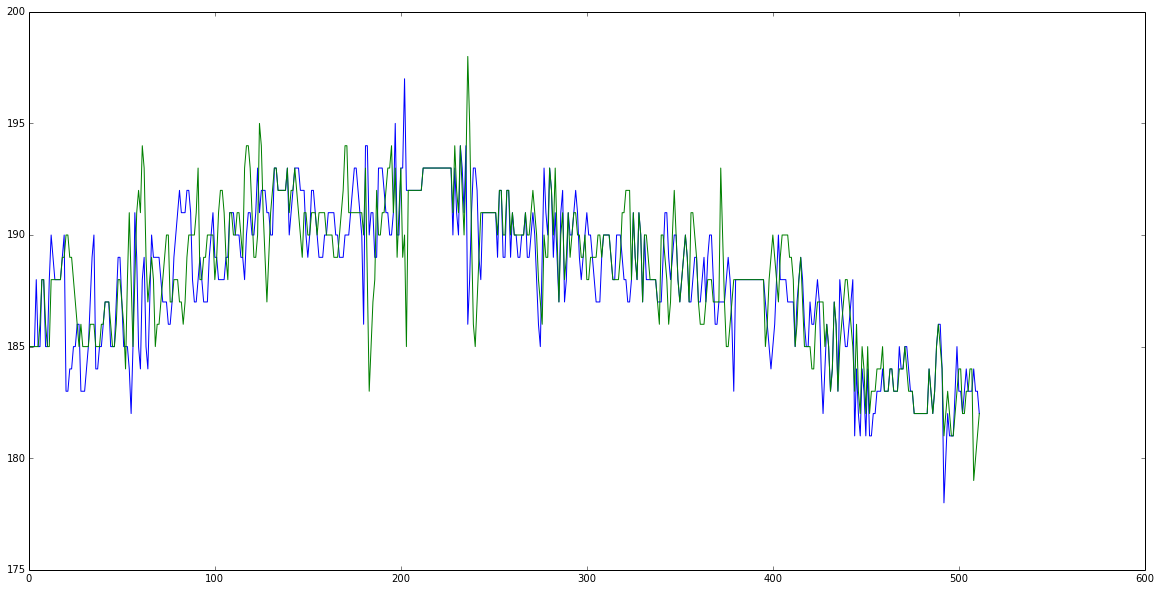

In [121]:
shifted_im = [im[0]]

#for i in range(0,len(im)-1):
for i in range(0,3):
    
    B = fft.fft(shifted_im[i])
    A = fft.fft(im[i+1])
    Ar = -A.conjugate()
    Br = -B.conjugate()

    idx = np.argmax(np.abs(fft.ifft(Ar*B)))  
    
    if idx > len(im)/2.:
        idx = -idx+len(im)
    
    if idx == 0:
        shifted_im.append(im[i])
    else:
        shifted_im.append(list(im[i][idx:])+list(im[i][:idx]))
    
    print(i,idx)


plt.figure(figsize=(20,10))
# Display with grayscale colour map 
#plt.imshow(tim,cmap=plt.cm.gray)
plt.plot(im[1])
plt.plot(shifted_im[1])

In [145]:
shifted_im = [im[0]]

for i in range(0,len(im)-1):
    
    A = fft.fft(shifted_im[i])
    B = fft.fft(im[i+1])
    Ar = -A.conjugate()
    Br = -B.conjugate()

    idx = np.argmax(np.abs(fft.ifft(Ar*B)))  
    
    if idx > len(im)/2.:
        idx = -idx+len(im)
    
    if idx == 0:
        shifted_im.append(im[i+1])
    else:
        shifted_im.append(list(im[i+1][idx:])+list(im[i+1][:idx]))

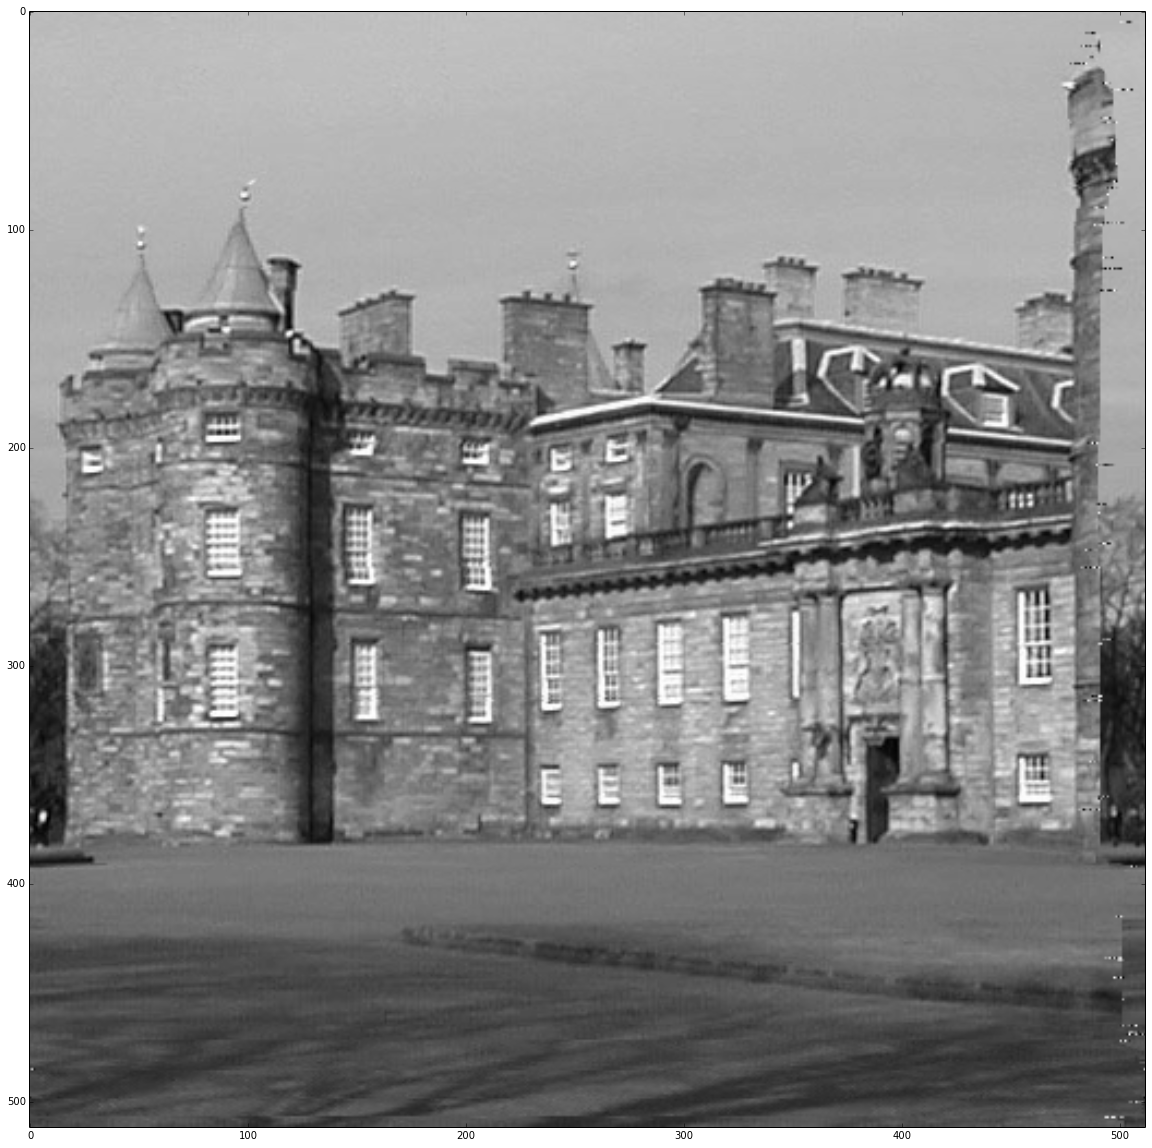

In [146]:
plt.figure(figsize=(40,20))
plt.imshow(shifted_im,cmap='gray')

In [147]:
def fix_image(im):
    shifted_im = [im[0]]

    for i in range(0,len(im)-1):

        A = fft.fft(shifted_im[i])
        B = fft.fft(im[i+1])
        Ar = -A.conjugate()
        Br = -B.conjugate()

        idx = np.argmax(np.abs(fft.ifft(Ar*B)))  

        if idx > len(im)/2.:
            idx = -idx+len(im)

        if idx == 0:
            shifted_im.append(im[i+1])
        else:
            shifted_im.append(list(im[i+1][idx:])+list(im[i+1][:idx]))
            
    plt.figure(figsize=(40,20))
    plt.imshow(shifted_im,cmap='gray')
    

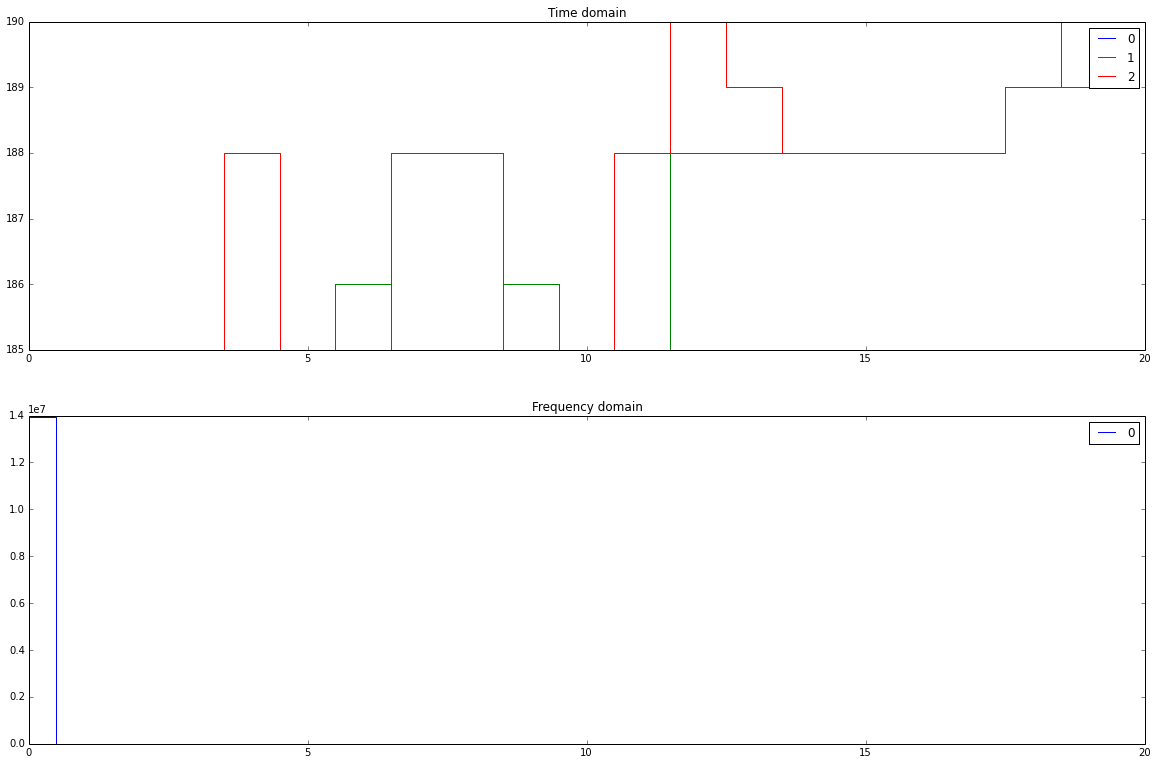

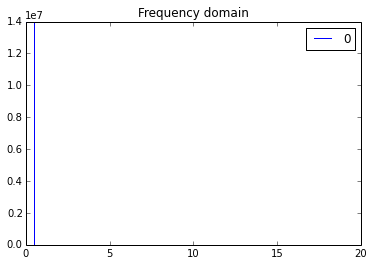

In [4]:
fig = plt.figure(figsize=(20,20))

#-----------------
# get the input waveform in the time domain

#for i in range(0,10):
#    amplitude = im[i]

#    fig.add_subplot(211)
#    plt.plot( amplitude , drawstyle='steps-mid',label=str(i) )
#    plt.title('Time domain')
    
#plt.legend() 

amplitude0 = im[0][:20]
amplitude1 = im[0][:20]
amplitude2 = im[1][:20]


fig.add_subplot(311)
plt.plot( amplitude0 , drawstyle='steps-mid',label='0') 
plt.plot( amplitude1 , drawstyle='steps-mid',label='1')
plt.plot( amplitude2 , drawstyle='steps-mid',label='2')
plt.title('Time domain')
plt.legend()

#-----------------
# Create the transform in the frequency domain

# Perform fft
amplitudeF0 = fft.fft(amplitude0)
amplitudeF1 = fft.fft(amplitude1)
amplitudeF2 = fft.fft(amplitude2)

fig.add_subplot(312)
plt.plot( amplitudeF0.imag*amplitudeF1.imag+amplitudeF0.real*amplitudeF1.real, drawstyle='steps-mid', label='0')
plt.title('Frequency domain')
plt.legend()
plt.show()

fig.add_subplot(313)
plt.plot( amplitudeF0.imag*amplitudeF2.imag+amplitudeF0.real*amplitudeF2.real, drawstyle='steps-mid', label='0')
plt.title('Frequency domain')
plt.legend()
plt.show()


In [5]:
imF = [fft.fft(row) for row in im]  

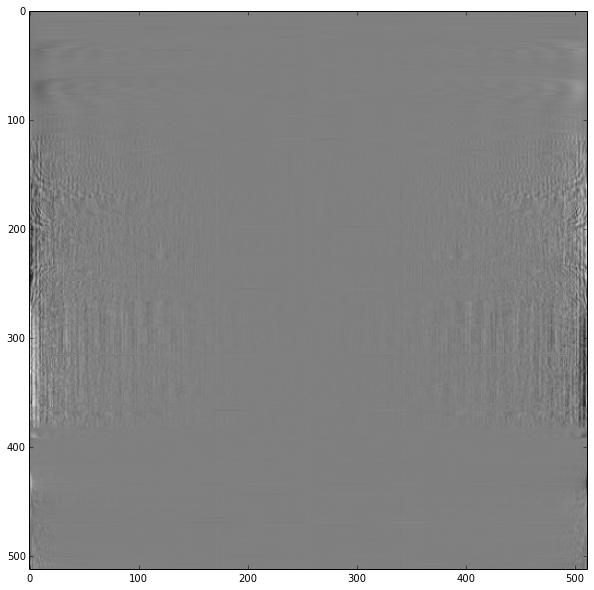

In [6]:
plt.figure(figsize=(20,10))
plt.imshow([row.imag for row in imF],cmap=plt.cm.gray)

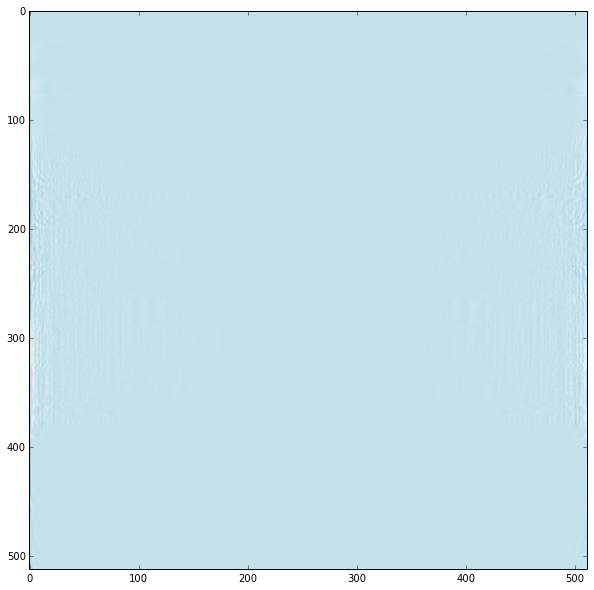

In [7]:
plt.figure(figsize=(20,10))
plt.imshow([row.real for row in imF],cmap=plt.cm.ocean_r)

(0, 20)

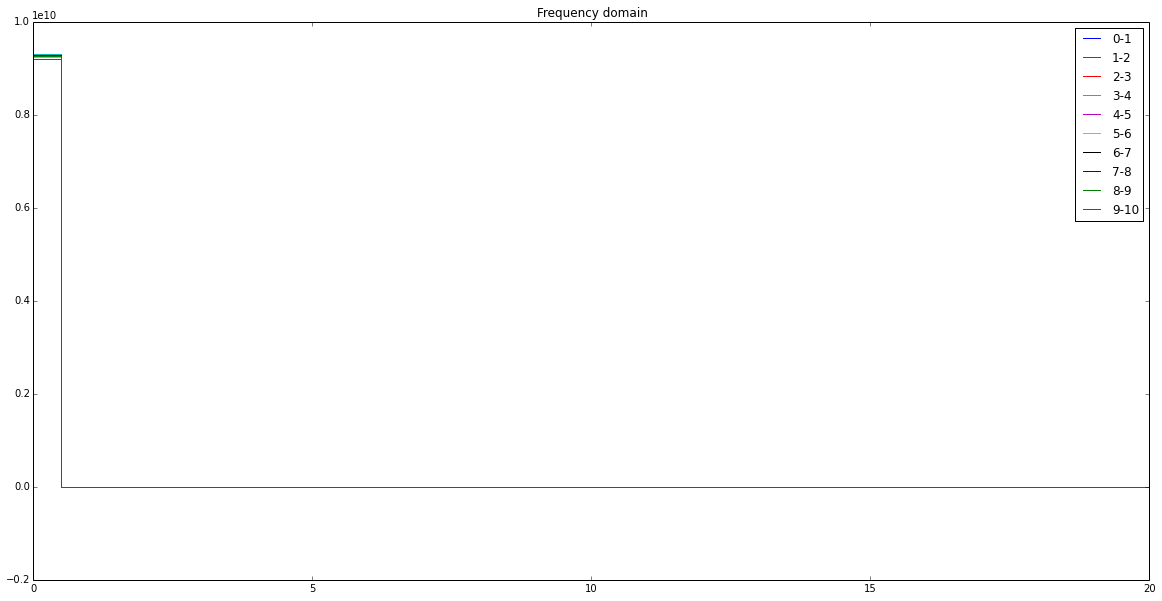

In [19]:
plt.figure(figsize=(20,10))

for i in range (0,10):
    amplitudeF0 = fft.fft(im[i])
    amplitudeF1 = fft.fft(im[i+1])
    plt.plot( amplitudeF0.imag*amplitudeF1.imag+amplitudeF0.real*amplitudeF1.real, drawstyle='steps-mid',label=str(i)+'-'+str(i+1))
    plt.title('Frequency domain')
    plt.legend()
    

plt.xlim(0,20)    

(0, 20)

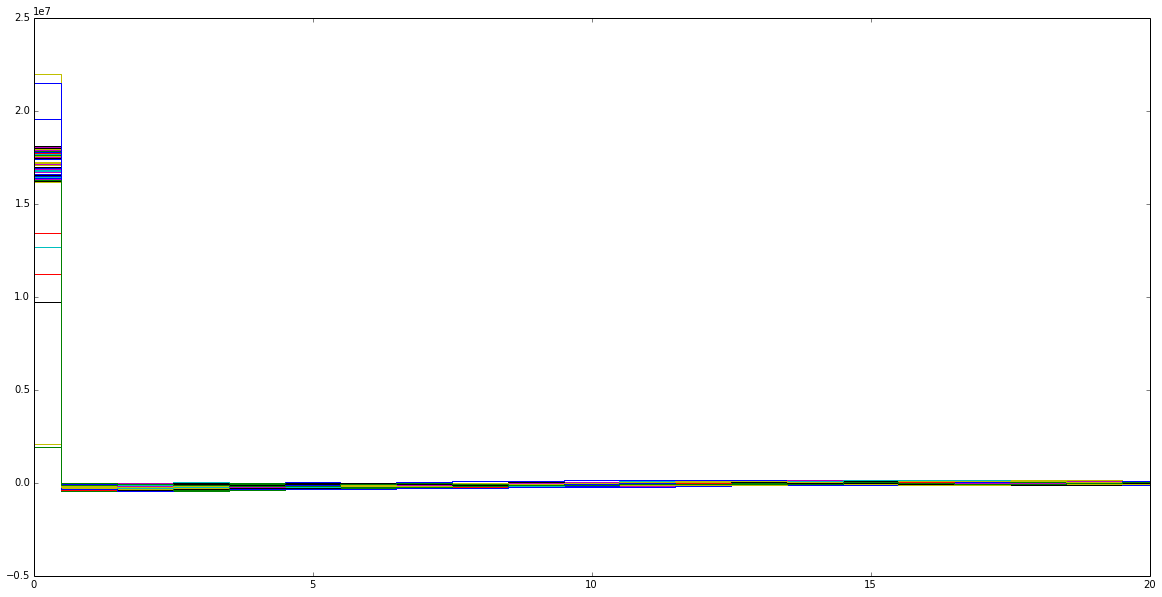

In [38]:
plt.figure(figsize=(20,10))
for i in range (0,100):
    plt.plot(fft.ifft(fft.fft(im[i]))*np.conj(fft.fft(im[i+1])),drawstyle='steps-mid')
    
plt.xlim(0,20)

In [24]:
corr(a, b) = ifft(fft(a_and_zeros) * conj(fft(b_and_zeros)))


SyntaxError: can't assign to function call (<ipython-input-24-9da143b3c7f1>, line 1)

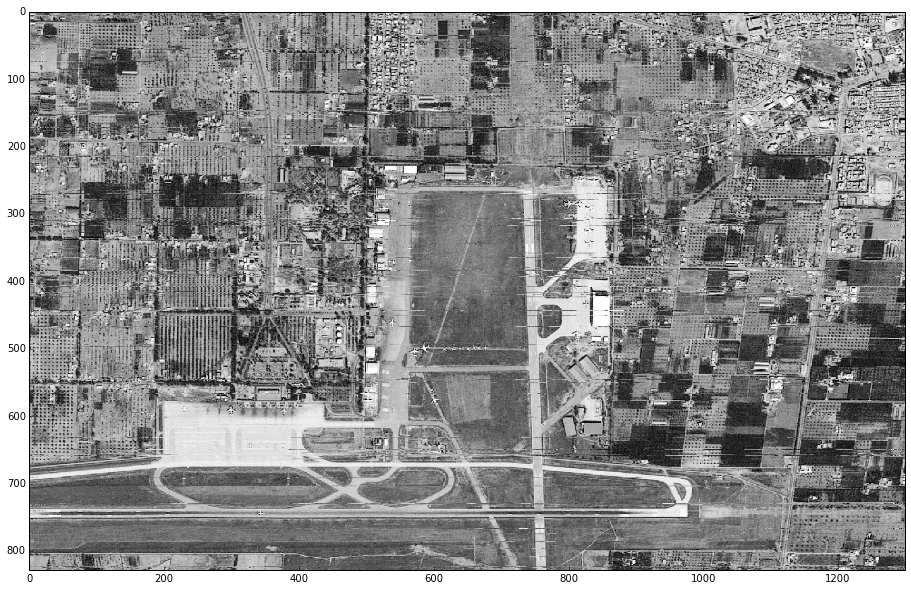

array([[ 51,  63,  79, ..., 163, 184, 187],
       [187, 123, 101, ..., 202, 202, 191],
       [ 92, 105,  93, ...,  10, 150, 201],
       ..., 
       [100,  46, 175, ..., 141, 168, 130],
       [185, 182, 191, ..., 138,  52,  25],
       [186, 179, 175, ..., 149,  73,  46]], dtype=uint8)

In [12]:
display_image('images/desync3.pgm')

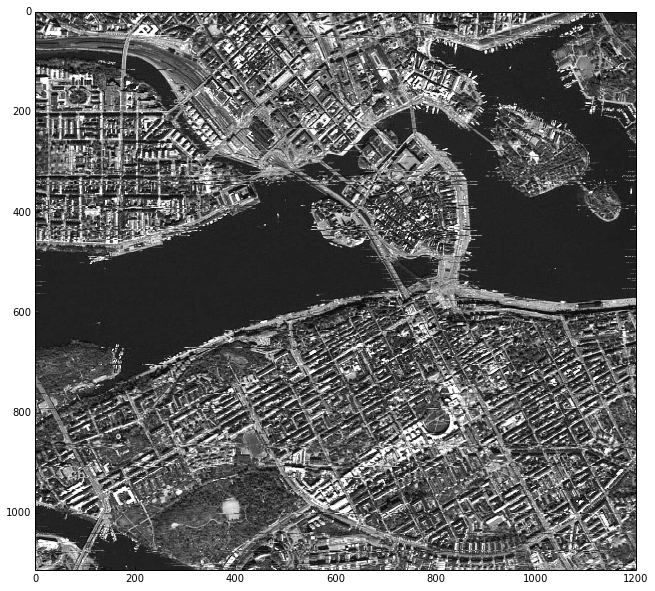

In [14]:
im = display_image('images/desync4.pgm')

In [16]:
im.shape

(1114, 1200)

In [48]:
t = np.array([i*0.1 for i in range(0,100)])
f = 1.

sig1 = 1.0 * np.sin(2. * np.pi * f * t) + 0.15 * np.sin(2. * np.pi * 4 * f *t)
sig2 = 1.2 * np.sin(2. * np.pi * f * t + np.pi) + 0.15 * np.sin(2. * np.pi * 3 * f *t)


In [1]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(t, sig1, t, sig2)
plt.xlabel('time(s)')

x = np.correlate( sig1, sig2,'full')
tx = np.linspace( -t[-1], t[-1], 2*len(t)-1)
print(x.shape)

plt.subplot(3,1,2)
plt.plot(tx, x)
plt.xlabel('time(s)')

idx = np.argmax(x)
print(idx,np.max(x))

plt.subplot(3,1,3)
plt.plot(t, sig1)
plt.plot(t+tx[idx], sig2)
plt.xlim(0,10)
plt.xlabel('time(s)')

NameError: name 'plt' is not defined

(1023,)
(511, (9246329343.9999962+2.255546860396862e-10j))


(0, 10)

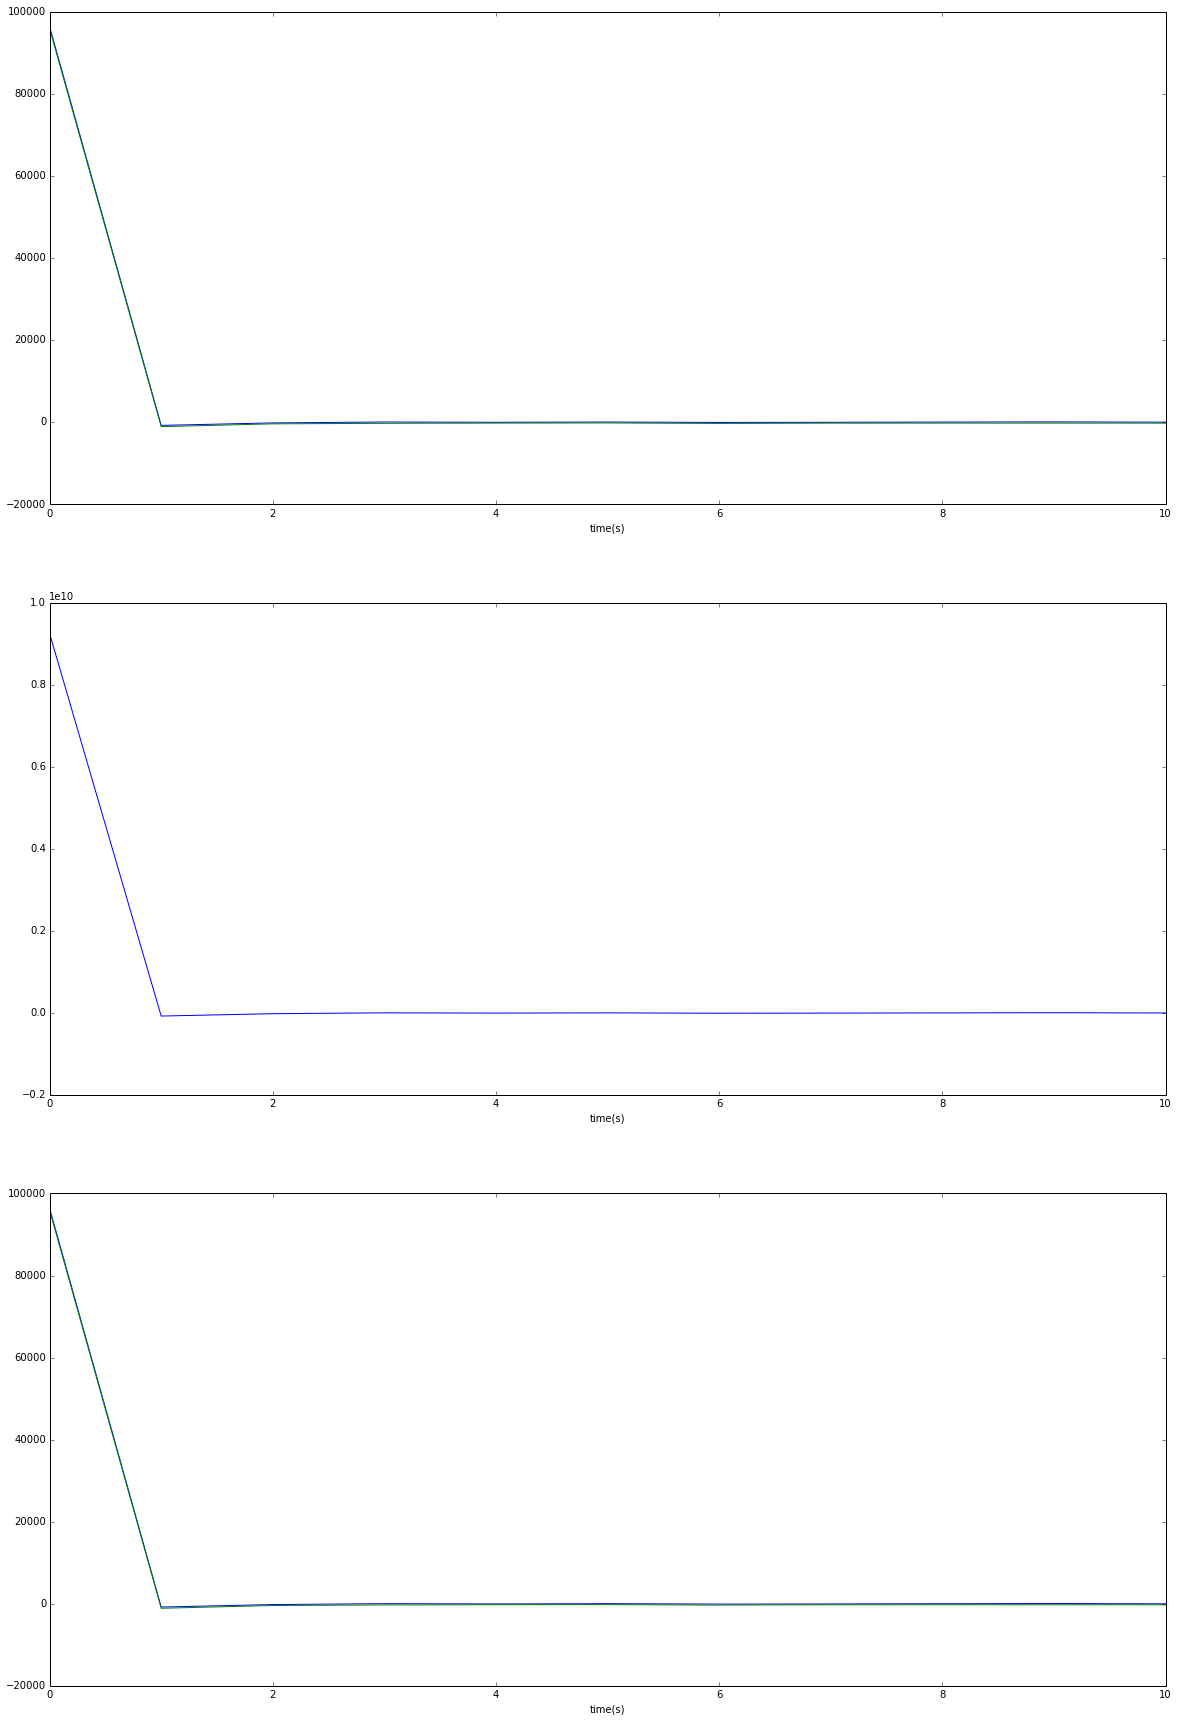

In [121]:
t = np.array([i for i in range(0,512)])

sig1 = fft.fft(im[4])
sig2 = fft.fft(im[5])

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(t, sig1) 
plt.plot(t, sig2)
plt.xlabel('time(s)')
plt.xlim(0,10)


x = np.correlate( sig1, sig2,'full')
print(x.shape)
tx = np.linspace( -t[-1], t[-1], 2*len(t)-1)

plt.subplot(3,1,2)
plt.plot(tx, x)
plt.xlabel('time(s)')
plt.xlim(0,10)

idx = np.argmax(x)
print(idx,x[idx])

plt.subplot(3,1,3)
plt.plot(t, sig1)
plt.plot(t+tx[idx], sig2)
plt.xlabel('time(s)')
plt.xlim(0,10)


(1023,)
(49, 255)


(0, 10)

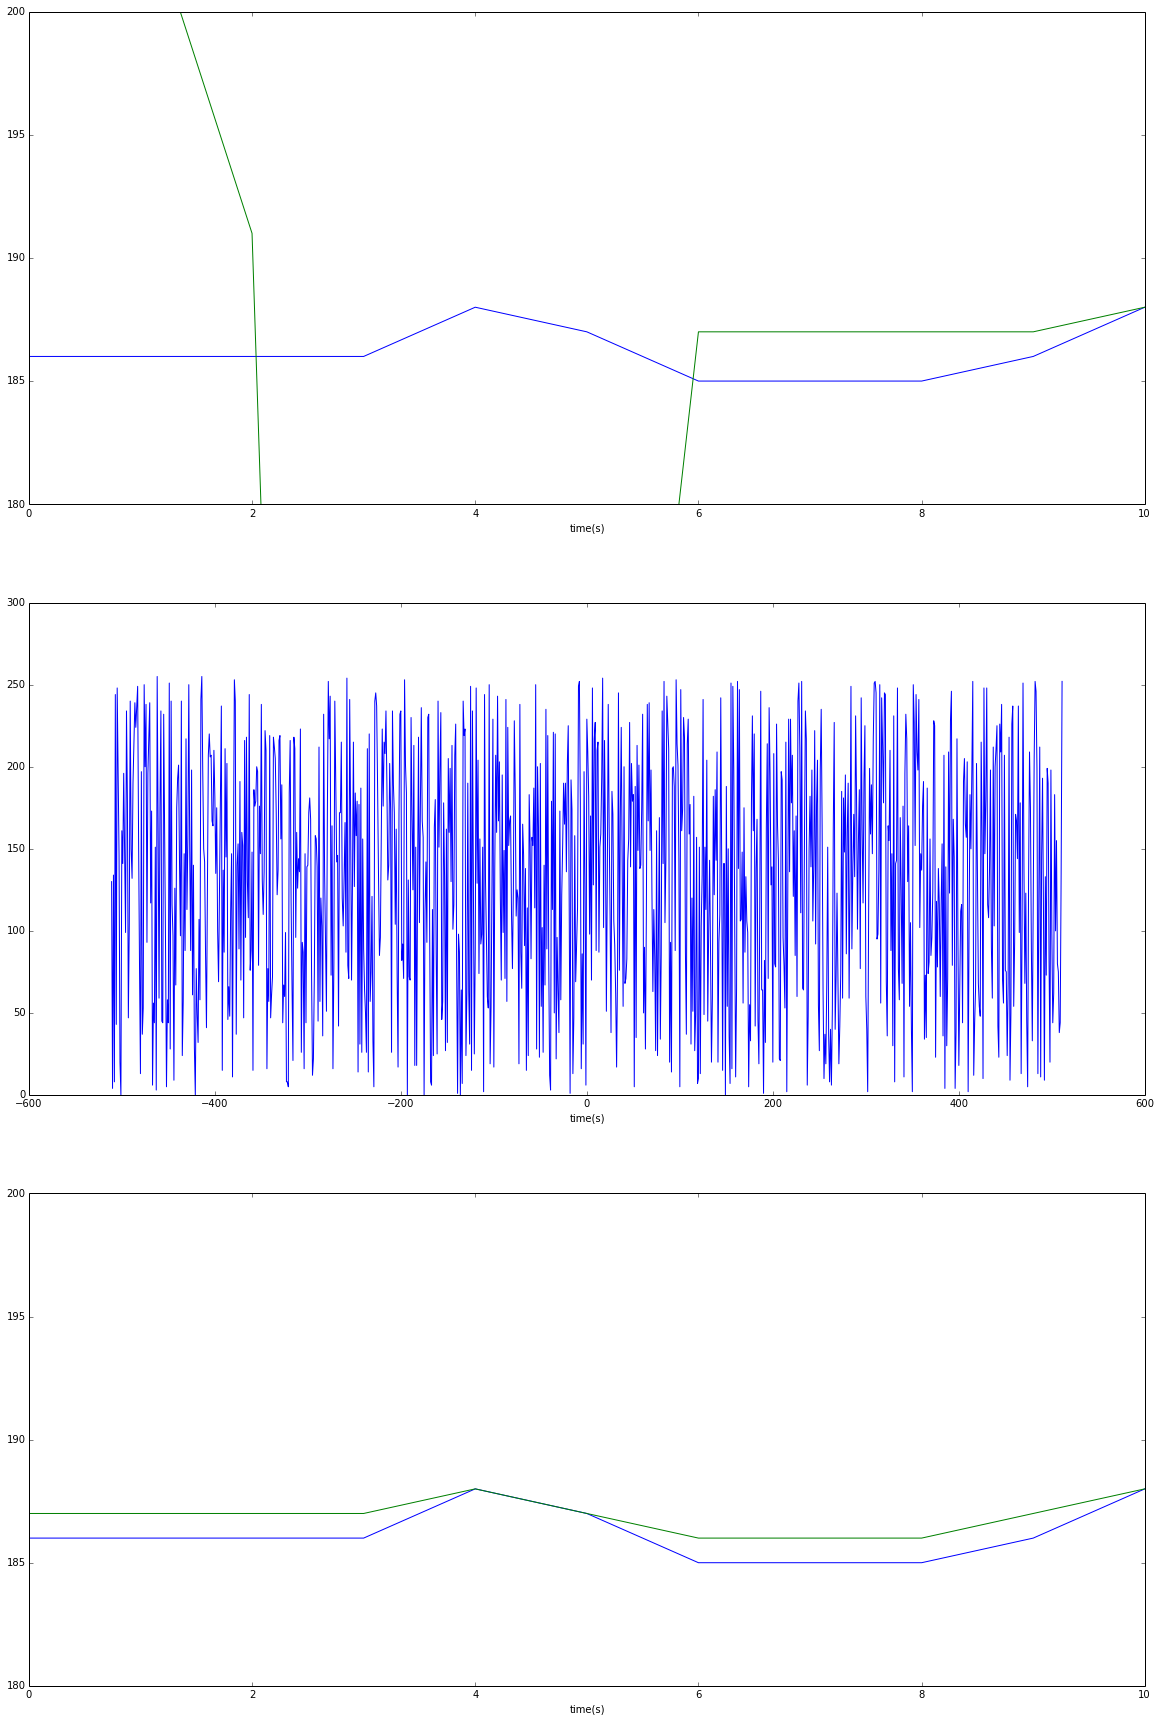

In [117]:
t = np.array([i for i in range(0,512)])

sig1 = im[4]
sig2 = im[5]

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(t, sig1) 
plt.plot(t, sig2)
plt.xlabel('time(s)')
plt.ylim(180,200)
plt.xlim(0,10)

x = np.correlate( sig1, sig2,'full')
print(x.shape)
tx = np.linspace( -t[-1], t[-1], 2*len(t)-1)

plt.subplot(3,1,2)
plt.plot(tx, x)
plt.xlabel('time(s)')

idx = np.argmax(x)
print(idx,x[idx])

plt.subplot(3,1,3)
plt.plot(t, sig1)
plt.plot(t-6, sig2)
plt.xlabel('time(s)')
plt.ylim(180,200)
plt.xlim(0,10)

In [109]:
plt.figure(figsize=(20,10))
plt.imshow([0 for row in im if ],cmap=plt.cm.gray)


-462.0

(594, 388.12199464619965)


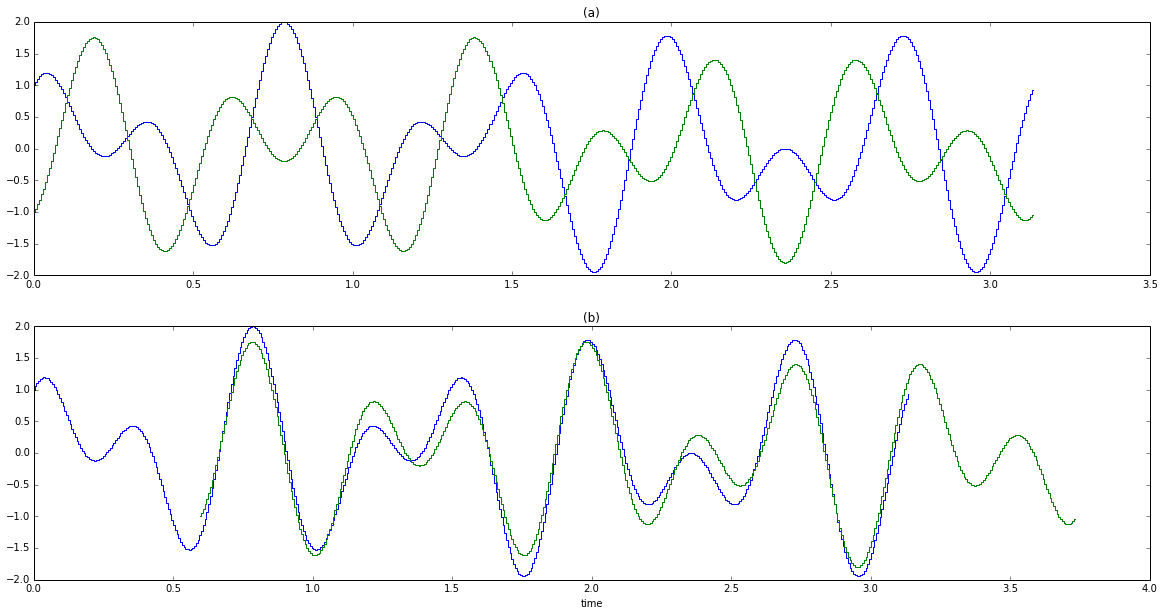

In [18]:
fig = plt.figure(figsize=(20,10))

#-----------------
# Create the input waveform in the time domain

samples = 500
increments = np.arange(samples)

#Make up a list of times in in a single period of 0 ->> 2*pi
times = 3.14159/float(samples)*increments

#Create the time domain signal with the required number of samples
amplitudeTime0 = np.cos(16.*times) + np.sin(10.*times)
amplitudeTime1 = np.cos(16.*times+np.pi) + 0.8*np.sin(10.*times)


fig.add_subplot(211)
plt.plot( times, amplitudeTime0 , drawstyle='steps-mid')
plt.plot( times, amplitudeTime1 , drawstyle='steps-mid' )
plt.title('(a)')

#-----------------
# Create the transform in the frequency domain

# Perform fft
amplitudeF0 = amplitudeTime0#fft.fft(amplitudeTime0)
amplitudeF1 = amplitudeTime1#fft.fft(amplitudeTime1)

#x = np.correlate( amplitudeF0, amplitudeF1,'full')
#tx = np.linspace( -times[-1], times[-1], 2*len(times)-1)

A = fft.fft(amplitudeF0)
B = fft.fft(amplitudeF1)
Ar = -A.conjugate()
#Br = -B.conjugate()

idx = np.argmax(np.abs(fft.ifft(Ar*B)))

idx = np.argmax(x)
print(idx,x[idx])

plt.subplot(212)
plt.title('(b)')
plt.plot(times, amplitudeTime0, drawstyle='steps-mid')
plt.plot(times+tx[idx], amplitudeTime1, drawstyle='steps-mid')
plt.xlabel('time')


plt.show()

(979, 3906248194.2990651)


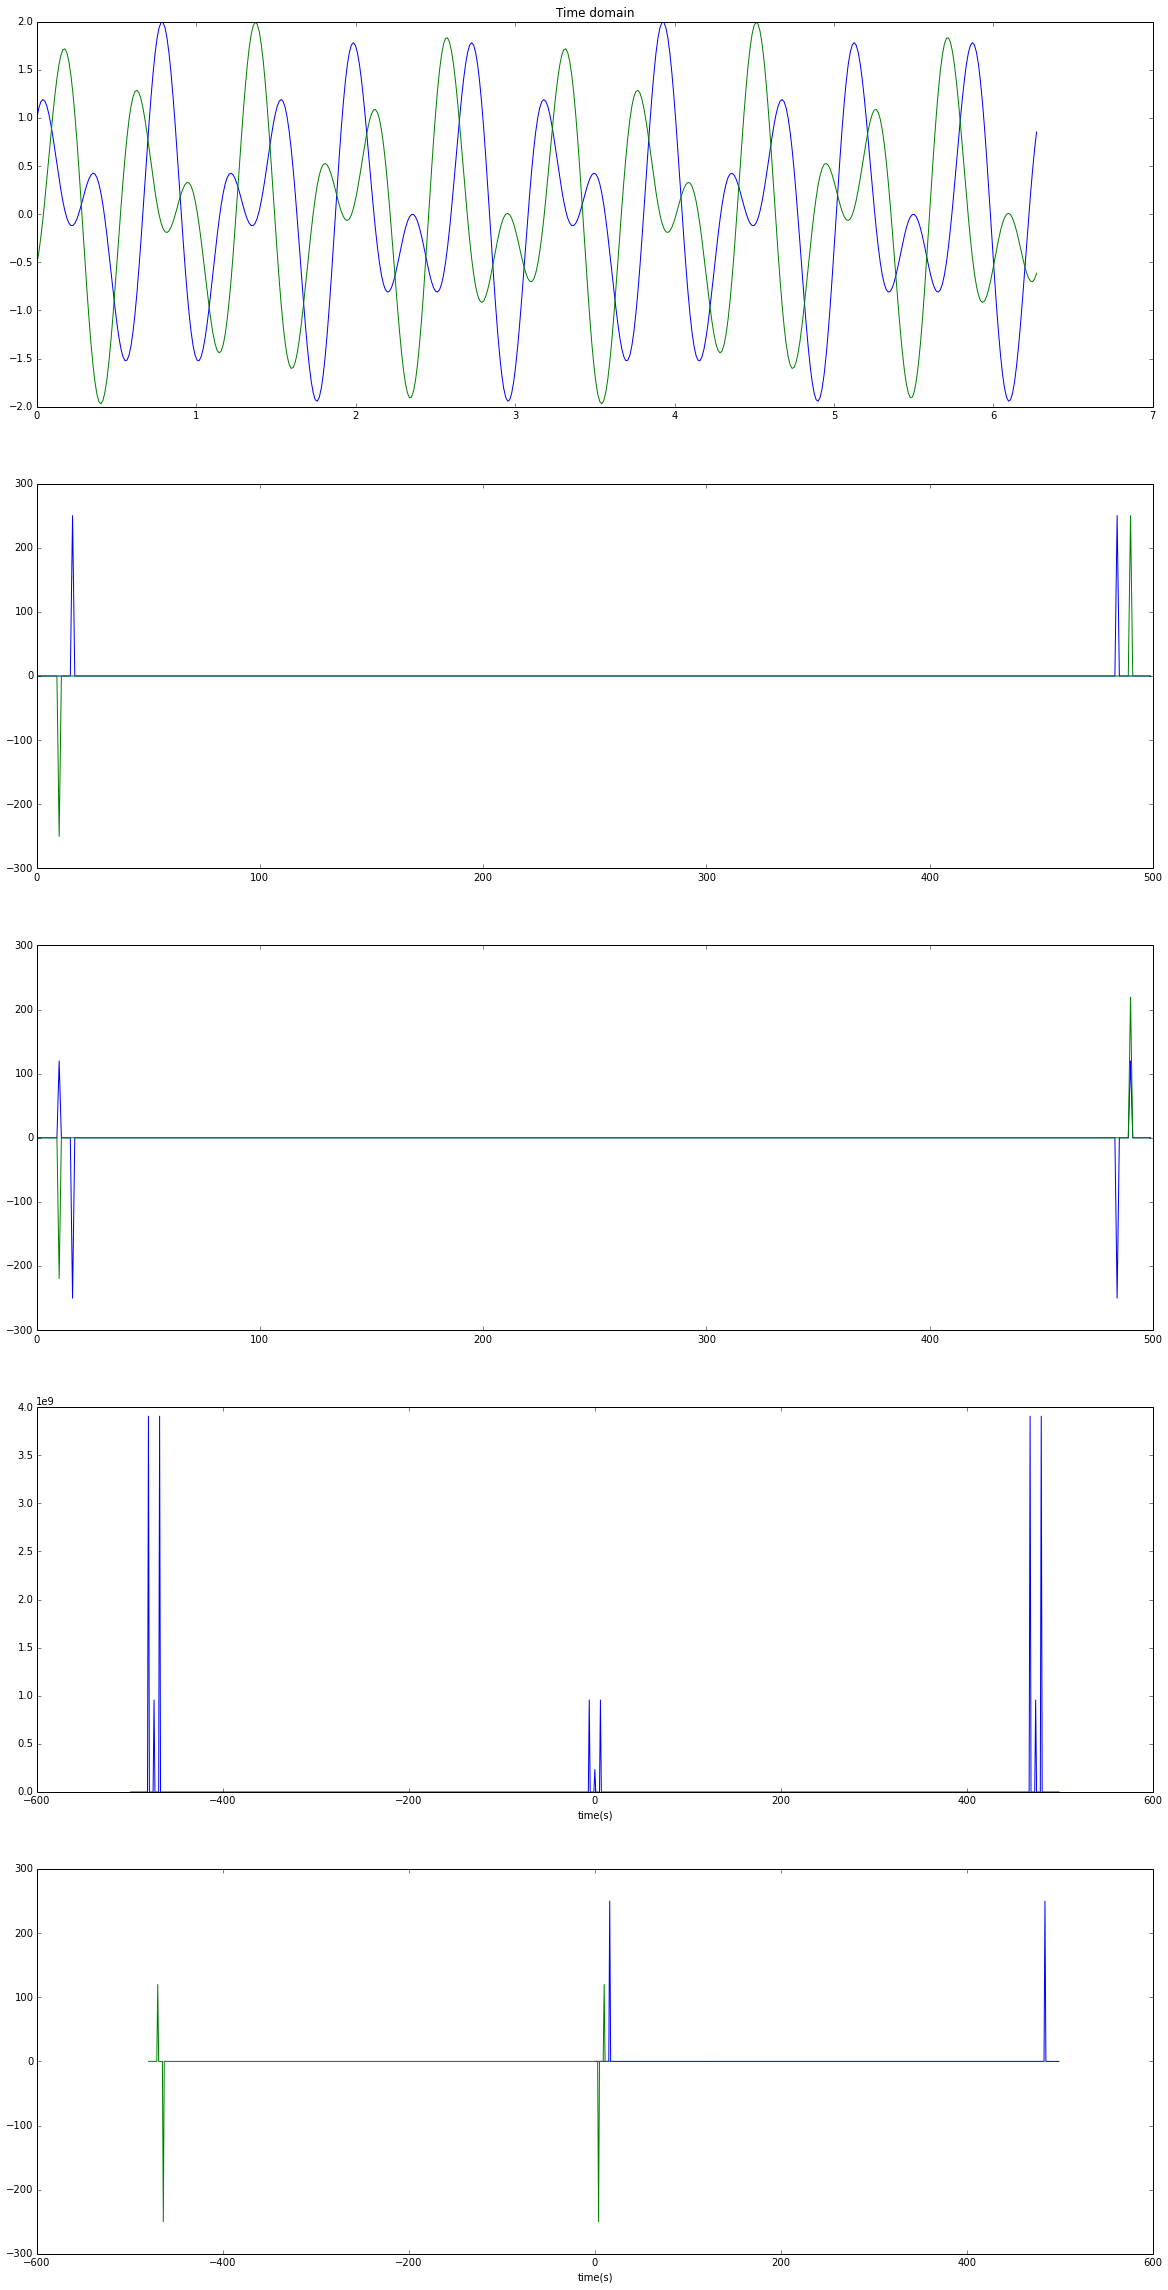

In [34]:
fig = plt.figure(figsize=(20,40))

#-----------------
# Create the input waveform in the time domain

samples = 500
increments = np.arange(samples)

#Make up a list of times in in a single period of 0 ->> 2*pi
times = 2.0*3.14159/float(samples)*increments

#Create the time domain signal with the required number of samples
amplitudeTime0 = np.cos(16.*times) + np.sin(10.*times)
amplitudeTime1 = np.cos(16.*times+np.pi) + np.sin(10.*times+0.5)


fig.add_subplot(511)
plt.plot( times, amplitudeTime0 )
plt.plot( times, amplitudeTime1 )
plt.title('Time domain')

#-----------------
# Create the transform in the frequency domain

# Perform fft
amplitudeF0 = fft.fft(amplitudeTime0)
amplitudeF1 = fft.fft(amplitudeTime1)

fig.add_subplot(512)
plt.plot( increments, amplitudeF0.real)
plt.plot( increments, amplitudeF0.imag)

fig.add_subplot(513)
plt.plot( increments, amplitudeF1.real)
plt.plot( increments, amplitudeF1.imag)

x = np.correlate( amplitudeF0, amplitudeF1,'full')
tx = np.linspace( -increments[-1], increments[-1], 2*len(increments)-1)

plt.subplot(514)
plt.plot(tx, [row.imag*row.imag+row.real*row.real for row in x])

plt.xlabel('time(s)')

idx = np.argmax([row.real*row.real+row.imag*row.imag for row in x])
print(idx,x[idx].real*x[idx].real+x[idx].imag*x[idx].imag)

plt.subplot(515)
plt.plot(increments, amplitudeF0.real)
plt.plot(increments-tx[idx], amplitudeF1.real)
plt.xlabel('time(s)')


plt.show()

plt.show()

In [2]:
fig = plt.figure(figsize=(20,40))

#-----------------
# Create the input waveform in the time domain

samples = len(np.pad(im[4],(1000, 1000),'constant'))
increments = np.arange(samples)

#Make up a list of times in in a single period of 0 ->> 2*pi
times = increments

#Create the time domain signal with the required number of samples
signal_one = np.pad(im[5][:-10],(1000, 1000),'constant')
signal_two = np.pad(im[5][10:],(1000, 1000),'constant')


fig.add_subplot(311)
plt.plot( times, signal_one )
plt.plot( times, signal_two )
plt.title('Time domain')

#-----------------
# Create the transform in the frequency domain


x = np.correlate( signal_one, signal_two,'full')
tx = np.linspace( -times[-1], times[-1], 2*len(times)-1)

plt.subplot(3,1,2)
plt.plot(x)
plt.xlabel('time(s)')

idx = np.argmax([np.abs(val) for val in x])
print(idx,x[idx])

plt.subplot(3,1,3)
plt.plot(times, signal_one)
plt.plot(times+tx[idx], signal_two)
plt.xlabel('time(s)')


plt.show()

NameError: name 'im' is not defined

In [7]:
np.pad(im[4],(1000, 1000),'constant')

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [5]:
x = np.correlate( amplitudeF0, amplitudeF1,'full')
tx = np.linspace( -increments[-1], increments[-1], 2*len(increments)-1)

(979, (-54850.462546064569+29961.224153592811j))


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


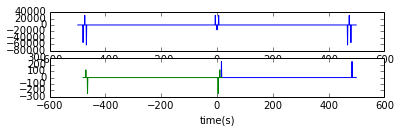

In [175]:
979-

array([ -9.52792982e-08 -1.47828796e-08j,
        -1.92030137e-07 -3.50129140e-08j,
        -2.92255680e-07 -6.23446746e-08j,
        -3.97944261e-07 -9.95026097e-08j,
        -5.10926163e-07 -1.51144706e-07j,
        -6.32267131e-07 -2.25870660e-07j,
        -7.59994118e-07 -3.41783218e-07j,
        -8.79091839e-07 -5.46959851e-07j,
        -8.90761032e-07 -1.05137856e-06j,
        -4.72657149e-02 +8.65214327e-02j,
        -2.87234288e-02 +3.16035168e-02j,
        -9.41574277e-03 +3.84854432e-02j,
         1.20530415e-02 +4.72647303e-02j,
         3.76993798e-02 +5.89319281e-02j,
         7.09175465e-02 +7.52731922e-02j,
         2.16917377e-01 +9.98670793e-02j,
         3.54683376e-01 +1.39798207e-01j,
         5.08208501e-01 +2.21525400e-01j,
         9.69145742e-01 +4.71365650e-01j,
        -5.48504625e+04 -2.99612242e+04j,
        -8.98018249e-01 -5.50867179e-01j,
        -4.52309449e-01 -3.06330328e-01j,
        -3.33999756e-01 -2.36080000e-01j,
        -3.43063865e-01 -2.2198878